<a href="https://colab.research.google.com/github/allisonribeirodf/alura-store-challenge/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [21]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


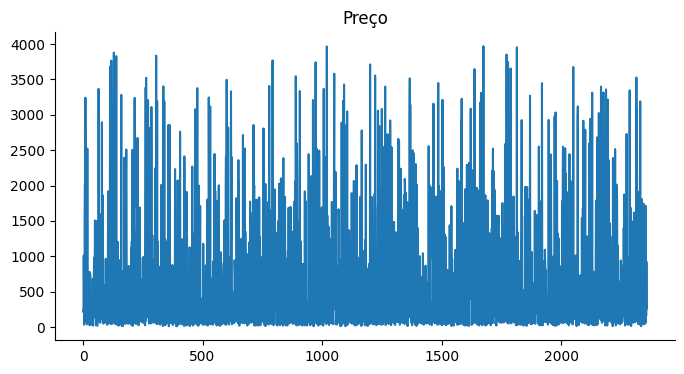

In [8]:
# @title Preço

from matplotlib import pyplot as plt
loja['Preço'].plot(kind='line', figsize=(8, 4), title='Preço')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=loja)

https://docs.google.com/spreadsheets/d/1Yy1Xi-Jkgev-_1IqErClKYF0HJ45a5VJSdY7Jzm4gmw/edit#gid=0


#1. Análise do faturamento


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np


# Calcular faturamento de cada loja
faturamento_total_loja1 = loja["Preço"].sum()
faturamento_total_loja2 = loja2["Preço"].sum()
faturamento_total_loja3 = loja3["Preço"].sum()
faturamento_total_loja4 = loja4["Preço"].sum()

# Exibir resultados
print(f"Faturamento Loja 1: R$ {faturamento_total_loja1:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_total_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_total_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_total_loja4:,.2f}")



Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


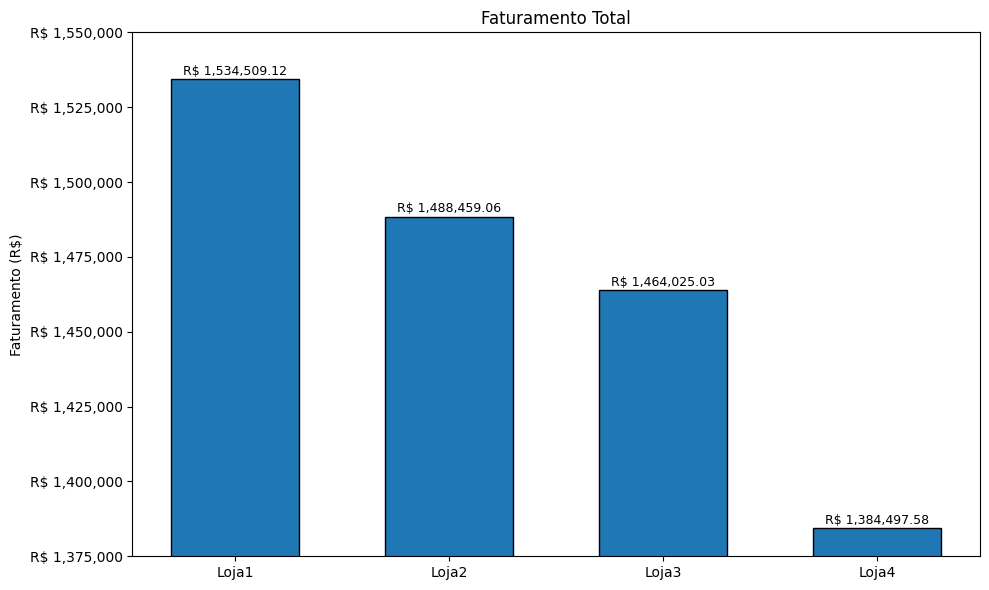

In [41]:
# montar DataFrame
df = pd.DataFrame({
    "Loja": ["Loja1", "Loja2", "Loja3", "Loja4"],
    "Faturamento": [
        faturamento_total_loja1,
        faturamento_total_loja2,
        faturamento_total_loja3,
        faturamento_total_loja4
    ]
}).sort_values("Faturamento", ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

# plotar barras
bars = ax.bar(
    df["Loja"],
    df["Faturamento"],
    width=0.6,
    color="#1f77b4",
    edgecolor="black"
)

# configurar ticks de Y de 25k em 25k
step = 25000
ymin = int(np.floor(df["Faturamento"].min() / step) * step)
ymax = int(np.ceil(df["Faturamento"].max() / step) * step)
ax.set_ylim(ymin, ymax)
ax.yaxis.set_major_locator(ticker.MultipleLocator(step))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f}"))

# remover grid de fundo
ax.grid(False)

# anotar valores acima das barras
for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + step * 0.015,
        f"R$ {h:,.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

# rótulos e título
ax.set_ylabel("Faturamento (R$)")
ax.set_title("Faturamento Total")

fig.tight_layout()
plt.show()

# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
